In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'#'LiH'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]#[('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################

Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anit_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anit_commuting_sets

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1961.48it/s]


{0: [(0.12062523481381837+0j) [Z0 Z2]],
 1: [(0.174412876106516+0j) [Z2 Z3]],
 2: [(0.1686889816869329+0j) [Z0 Z1]],
 3: [(0.16592785032250768+0j) [Z0 Z3]],
 4: [(-0.09706626861762624+0j) []],
 5: [(0.16592785032250768+0j) [Z1 Z2]],
 6: [(0.12062523481381837+0j) [Z1 Z3]],
 7: [(0.17141282639402405+0j) [Z0], (0.04530261550868928+0j) [X0 Y1 Y2 X3]],
 8: [(-0.2234315367466397+0j) [Z2], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]],
 9: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 10: [(-0.2234315367466397+0j) [Z3], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]]}

The Hamiltonian is a sum of $m$ PauliWords:

$$H=\sum_{j=0}^{m-1} \alpha_{j} P_{j}$$

In this there are $l$ completely anti-commuting sets, denoted as $H_{S_{l}}$:


$$H =\sum_{l} H_{S_{l}}$$

where each anti-commuting set is defined as:

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}$$

where:
- $\left\{P_{j}, P_{k}\right\}=0$ for $\forall P_{j} \neq P_{k} \in S_{l}$


We want **want** the sum of the squares of the cofactors to be 1:

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$$

- aka: $\sum_{j} \beta_{j}^{2}=1$
- and $\gamma_{l}$ is the correction factor: $\alpha_{j} =  \gamma_{l} \beta_{j}$

SO overall we can turn our Hamiltonian into $l$ anti_commutings sets as:

$$H=\sum_{l} H_{S_{l}} = \sum_{l} \sum_{\substack{j=0 \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \alpha_{j} P_{j}= \sum_{l} \gamma_{l} \sum_{\substack{j=0 \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$

We will focus on looking at just one anti-commuting set

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$$

////////////////

1. re-write set $H_{S_{l}}$ ($=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$) with $\beta_{n} P_{n}$ outside sum :


$$H_{S_{l}}= \gamma_{l} \beta_{n} P_{n} +  \gamma_{l} \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$

- $\sum_{j} \beta_{j}^{2}=1$
- $\alpha_{j} =  \gamma_{l} \beta_{j}$

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$


2. The definition of $H_{n-1}$ is:

$$H_{n-1}=\sum_{k=1}^{n-1} \delta_{k} P_{k}$$

where: $\sum_{k=1}^{n-1} \delta_{k}^{2}=1$

therefore using what we obtained in step 1:

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \delta_{j} P_{j}$$

where:
- $\sum_{j} \delta_{j}^{2}=1$
- $\beta_{j} =  \Omega_{l} \delta_{j}$


3.

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1}$$

$H_{n}$ is defined as:

$$H_{n}=\cos \phi_{n-1} P_{n}+\sin \phi_{n-1} H_{n-1}$$

Using what we have from step 3:

$$\cos \phi_{n-1}= {\beta_{n}} $$

OR

$$\sin \phi_{n-1}= {\Omega_{l}} $$

# Question ^^^ which one of these?

doesn't matter as 

$$\beta_{n}^{2} + {\Omega_{l}}^{2} = 1 $$

In [ ]:
# wrong

# can also do:

# (starting from step 3)

# $$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1}$$

# $$\frac{H_{S_{l}}}{\gamma_{l}\Omega_{l}}=  \frac{\beta_{n}}{\Omega_{l}} P_{n} +   H_{n-1}$$

# THEN

# $$\cos \phi_{n-1}= \frac{\beta_{n}}{\Omega_{l}} $$

# OR

# $$\sin \phi_{n-1}= 1 $$


## Step 1 Get Hn set

using
$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1} = H_{n}$$

where

$$\cos \phi_{n-1}= {\beta_{n}} $$

## Step 2 getting X

NOW

$\mathcal{X}$ is defined as:

$$\begin{aligned} \mathcal{X} &=\frac{i}{2}\left[H_{n-1}, P_{n}\right] \\ &=\frac{i}{2} \sum_{k=1}^{n-1} \delta_{k}\left[P_{k}, P_{n}\right] \\ &=i \sum_{k=1}^{n-1} \delta_{k} P_{k} P_{n} \\ &=i \sum_{k=1}^{n-1} \delta_{k} P_{kn} \end{aligned}$$

where:
- $H_{n-1}=\sum_{k=1}^{n-1} \delta_{k} P_{k}$
- $\sum_{k=1}^{n-1} \delta_{k}^{2}=1$

In [2]:
from quchem.LCU_method import *

In [3]:
Get_X_SET(anit_commuting_sets[8], 1)

{'X_PauliWords': [(-1+0j) [X0 X1 X2 Y3]],
 'H_n': [(-0.9800573521796645+0j) [Z2],
  (-0.19871483698653464+0j) [X0 X1 Y2 Y3]],
 'P_n': 1 [X0 X1 Y2 Y3],
 'gamma_l': (0.22797802215321797+0j),
 'H_n_1': [(-1+0j) [Z2]],
 'Omega_l': (0.9800573521796646+0j),
 'phi_n_1': (1.770842758748273-0j)}

$$H_{n}= \sin \phi_{n-1} H_{n-1} + \cos \phi_{n-1} P_{n}$$

In [202]:
test = Get_X_SET(anit_commuting_sets[10], 1)
print(test['H_n'])
print('should equal')
print(np.sin(test['phi_n_1']), '*',test['H_n_1'],' + ', np.cos(test['phi_n_1']),  '*',test['P_n'])

[(-0.9800573521796645+0j) [Z3], (-0.19871483698653464+0j) [Y0 Y1 X2 X3]]
should equal
(0.9800573521796645+0j) * [(-1+0j) [Z3]]  +  (-0.19871483698653464+0j) * 1 [Y0 Y1 X2 X3]


In [203]:
print(test['X_PauliWords'])
print('should equal')
print('i', ' * ',test['H_n_1'],' * ',test['P_n'])

print('ZX = 1jY')

print(1j*-1*1j, '[Y0 Y1 X2 Y3]')

[(1-0j) [Y0 Y1 X2 Y3]]
should equal
i  *  [(-1+0j) [Z3]]  *  1 [Y0 Y1 X2 X3]
ZX = 1jY
(1-0j) [Y0 Y1 X2 Y3]


Now $\mathcal{X}$ acts on $H_{n}$ as follows:

$$\mathcal{X} H_{n}=i\left(-\sin \phi_{n-1} P_{n}+\cos \phi_{n-1} H_{n-1}\right)$$

where:
- $H_{n}=\sin \phi_{n-1} H_{n-1}+\cos \phi_{n-1} P_{n}$

remember:

- $H_{n}=\frac{H_{S}}{\gamma_{l}}= \beta_{n} P_{n} + \Omega_{l} H_{n-1}$... which defines what $\phi_{n-1}$ is!


We let:
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \mathcal{X}$$

then the following:
$$R H_{n} R^{\dagger}=\sin \left(\phi_{n-1}-\alpha\right) H_{n-1}+\cos \left(\phi_{n-1}-\alpha\right) P_{n}$$

by **choosing**: $\alpha=\phi_{n-1}$
we get:

$$R H_{n} R^{\dagger}=P_{n}$$

- note $\alpha = arccos(\beta_{n})$ 

overall we want **$$ H_{n} = R^{\dagger} P_{n} R$$**

To do this via a **quantum circuit** we do the following:

$$ \langle H_{n}\rangle =  \langle \psi_{UCCSD}|R^{\dagger} P_{n} R |\psi_{UCCSD}\rangle = M_{z} U_{n}R|\psi_{UCCSD}\rangle$$ 

where:
- $ U_{n}$ is a change of basis of $P_{n}$ to $Z$ basis for measurement!
- $M_{z}$ is a measurement in $Z$ basis resuliting in: $ \langle \psi_{UCCSD}|R^{\dagger} U_{n}^{\dagger} M_{z}^{\dagger} M_{z} U_{n}R|\psi_{UCCSD}\rangle$


NOW!
let us take a closer look at:
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \mathcal{X}$$

this is just a **LINEAR COMBINATION OF PAULIWORDS!**

- $\mathcal{X}=i \sum_{k=0}^{n-1} \delta_{k} P_{kn}$ (index starts at 0 with identity term included!)

$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

my code has $\bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$ in code!

(could simplify too: [not doing atm])
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}+ \sin (\alpha / 2) \bigg( \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

In [189]:
anit_commuting_sets[9]

[(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]]

In [190]:
Get_R_linear_combination(anit_commuting_sets[7], 1)

([(0.7923119236307757+0j) [], 0.6101162312809747j [Y0 Y1 Y2 X3]],
 1 [X0 Y1 Y2 X3],
 (0.17729829109248618+0j))

## linear combination of unitaries method!

https://arxiv.org/pdf/1610.06546.pdf

- for any operator $\hat{O}$ that is a sum of **unitary** operators $\hat{U}_{j}$:

$$\hat{O}=\sum_{j=1}^{d} \alpha_{j} \hat{U}_{j}$$

- where $\|\hat{O}\| \leq\|\vec{\alpha}\|_{1}=\sum_{j=1}^{d}\left|\alpha_{j}\right|$

and

- **IMPORTANT** $\forall \alpha_{j}$ we have  $\alpha_{j} \geq 0$ AKA absorbing complex phases into $\hat{U}_{j}$

If we define the following:

$$\hat{U}=\sum_{j=1}^{d}|j\rangle\left\langle\left. j\right|_{a} \otimes \hat{U}_{j}\right.$$

$$\hat{G}=\sum_{j=1}^{d} \sqrt{\frac{\alpha_{j}}{\|\vec{\alpha}\|_{1}}}|j\rangle\left\langle\left. 0\right|_{a}\right.$$

We have:

$$\hat{U} \hat{G}|0\rangle_{a}|\psi\rangle_{s} = \hat{U} |G\rangle_{a}|\psi\rangle_{s}$$

This results in:

$$\hat{U}|G\rangle_{a}|\psi\rangle_{s}=|G\rangle_{a} \hat{O}|\psi\rangle_{s}+\sqrt{1-\| \hat{O}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$


- the measurement succeed with probability: $\| \hat{O}|\psi\rangle \|^{2}$
    - and $\hat{U}|G\rangle_{a}|\psi\rangle_{s}$ is **projected** onto $\frac{|G\rangle_{a} \hat{O}|\psi\rangle_{s}}{\| \hat{O}|\psi\rangle \|}$

- and fails if it goes onto orthogonal complement : $|G_{\psi}^{\perp}\rangle_{a s} = |G^{\perp}\rangle_{a}|\psi\rangle_{s}$


NOTE:
as **probabilities are bounded by 1** the operator $\hat{O}$ must have spectral norm $\|\hat{O}\| \leq 1$

(hence is $l_1$ normalised!)


In [ ]:
# note:
# G|\hat{U}| G\rangle=\frac{\hat{O}}{\|\vec{\alpha}\|_{1}}$$

## ### method uses l1-norm and gives worse answer!

In [ ]:
# def absorb_complex_phases(R_linear_comb_list):
    
#     R_linear_comb_corrected_phase=[]
#     R_linear_comb_correction_values=[]
#     ancilla_amplitudes=[]

#     l1_norm = sum([np.absolute(const) for qubitOp in R_linear_comb_list for PauliWord, const in qubitOp.terms.items()])
#     if l1_norm>1:
#         raise ValueError('l1_norm means correct amps not obtained')
    
#     for qubitOp in R_linear_comb_list:
#         for pauliword, const in qubitOp.terms.items():
#             if (isinstance(const, complex)) and (const.imag<0):
#                 R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(np.sqrt(const.imag**2)/l1_norm)))
#                 R_linear_comb_correction_values.append(-1j)
#                 ancilla_amplitudes.append(np.sqrt(np.sqrt(const.imag**2)/l1_norm))
#             elif (isinstance(const, complex)) and (const.imag!=0):
#                 R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(np.sqrt(const.imag**2)/l1_norm)))
#                 R_linear_comb_correction_values.append(1j)
#                 ancilla_amplitudes.append(np.sqrt(np.sqrt(const.imag**2)/l1_norm))
#             elif const<0:
#                 R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(np.sqrt(const**2)/l1_norm)))
#                 R_linear_comb_correction_values.append(-1)
#                 ancilla_amplitudes.append(np.sqrt(np.sqrt(const**2)/l1_norm))
#             else:
#                 R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(const/l1_norm)))
#                 R_linear_comb_correction_values.append(1)
#                 ancilla_amplitudes.append(np.sqrt(const/l1_norm))
    
    
#     if not np.isclose(sum([amp**2 for amp in ancilla_amplitudes]), 1):
#         raise ValueError('ancilla amplitudes wrong')
    
    
    
#     return R_linear_comb_corrected_phase, R_linear_comb_correction_values, ancilla_amplitudes

### method doesn't use l1-norm and gives better answer!

I believe this is due to operator being l2 normalised! (and we are using l2 norms)

aka we are implementing R:

$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

as a linear combination of unitaries (which are PauliWords)... Note this operators is $l_{2}$ normalised!

note:
- $\|A\|_{1}=\max _{1 \leq j \leq n} \sum_{i=1}^{m}\left|a_{i j}\right|$
- $\|A\|_{2}=\sigma_{\max }(A) \leq\|A\|_{\mathrm{F}}=\left(\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}\right)^{\frac{1}{2}}$

example:

$A=\left[\begin{array}{ccc}-3 & 5 & 7 \\ 2 & 6 & 4 \\ 0 & 2 & 8\end{array}\right]$

$\|A\|_{1}=\max (|-3|+2+0 ; 5+6+2 ; 7+4+8)=\max (5,13,19)=19$

$\|A\|_{2} \leq \|A\|_{F}= \sqrt{|-3|^{2}+|2|^{2}+|0|^{2}+|5|^{2}+|6|^{2}+|2|^{2} +|7|^{2}+|4|^{2} +|8|^{2}}=\sqrt{207}=14.39$

In [ ]:
# A = np.array([[-3,5,7],
#          [2,6,4],
#          [0,2,8]])

# # np.dot(A.transpose(), A)
# val, vec = np.linalg.eig(np.dot(A.transpose(), A))
# np.sqrt(max(val))

$A*A=\left[\begin{array}{ccc} 13 & -3 & -13 \\ -3 & 65 & 75 \\ -13 & 75 & 129\end{array}\right]$

eigenvalues = [179.48079367,   8.81029291,  18.70891342]

$\lambda_{\max }\left(A^{*} A\right)=179.48079367$

$\|A\|_{2}=\sqrt{\lambda_{\max }\left(A^{*} A\right)}=\sigma_{\max }(A)$

- $\sigma_{\max }(A)$ represents the largest singular value of matrix $A$

$\|A\|_{2}=\sqrt{179.48079367}= 13.397044214055192$

Looking at this using LCU theory

- we have an operator $\hat{O}$ that is a sum of **unitary** operators $\hat{U}_{j}$:

$$\hat{O}=\sum_{j=1}^{d} \alpha_{j} \hat{U}_{j}$$

- where $\|\hat{O}\|_{2} \leq\|\vec{\alpha}\|_{2}=\sqrt{\sum_{j=1}^{d}\left|\alpha_{j}\right|^{2}}$

NOTE:
The the $l_{2}$ norm of a matrix must be less than it's Frobenius norm which is the sum of the square root of the squares of each matrix element. We have PauliMatrices and so all entries have norm one... hence $\|\hat{R}\|_{2}$ must be less than or equal too the $\|\vec{\alpha}\|_{2}$!


and

- **IMPORTANT** $\forall \alpha_{j}$ we have  $\alpha_{j} \geq 0$ AKA absorbing complex phases into $\hat{U}_{j}$

If we define the following:

$$\hat{U}=\sum_{j=1}^{d}|j\rangle\left\langle\left. j\right|_{a} \otimes \hat{U}_{j}\right.$$

$$\hat{G}=\sum_{j=1}^{d} \sqrt{\frac{\left|\alpha_{j}\right|^{2}}{\|\vec{\alpha}\|_{2}}}|j\rangle\left\langle\left. 0\right|_{a}\right.$$

We have:

$$\hat{U} \hat{G}|0\rangle_{a}|\psi\rangle_{s} = \hat{U} |G\rangle_{a}|\psi\rangle_{s}$$

This results in:

$$\hat{U}|G\rangle_{a}|\psi\rangle_{s}=|G\rangle_{a} \hat{O}|\psi\rangle_{s}+\sqrt{1-\| \hat{O}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$


- the measurement succeed with probability: $\| \hat{O}|\psi\rangle \|^{2}$
    - and $\hat{U}|G\rangle_{a}|\psi\rangle_{s}$ is **projected** onto $\frac{|G\rangle_{a} \hat{O}|\psi\rangle_{s}}{\| \hat{O}|\psi\rangle \|}$

- and fails if it goes onto orthogonal complement : $|G_{\psi}^{\perp}\rangle_{a s} = |G^{\perp}\rangle_{a}|\psi\rangle_{s}$


NOTE:
as **probabilities are bounded by 1** the operator $\hat{O}$ must have spectral norm $\|\hat{O}\| \leq 1$

In [5]:
test, Pn, gamma_l = Get_R_linear_combination(anit_commuting_sets[7],1)
print(test)

print('')
print(Pn, gamma_l)
absorb_complex_phases(test)

[(0.7923119236307757+0j) [], 0.6101162312809747j [Y0 Y1 Y2 X3]]

1 [X0 Y1 Y2 X3] (0.17729829109248618+0j)


([0.7923119236307757 [], 0.6101162312809747 [Y0 Y1 Y2 X3]],
 [1, 1j],
 [(0.7923119236307757+0j), 0.6101162312809747])

In [6]:
new = [QubitOperator('X0 X1', 0.25), QubitOperator('Z0 X1', -0.75)]
R_lin, Pn_new, gamma_l_new = Get_R_linear_combination(new, 1)
absorb_complex_phases(R_lin)

([0.16018224300696726 [], 0.9870874576374967 [Y0]],
 [1, (-0-1j)],
 [0.16018224300696726, 0.9870874576374967])

In [7]:
R_COB, R_COR, A_AMPs= absorb_complex_phases(R_lin)
np.prod([i**2 for i in R_COR])

(-1+0j)

In [8]:
x = QubitOperator('X0 Z2 Y3', 0.25j)
N_ancilla_qubits = 2
N_system_qubits = 10

measure_circ_obj = Measure_system_and_ancilla(x, N_ancilla_qubits, N_system_qubits)
# print(cirq.Circuit((measure_circ_obj(*cirq.LineQubit.range(measure_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((measure_circ_obj(*cirq.LineQubit.range(measure_circ_obj.num_qubits()))))))

0: ────M───
       │
2: ────M───
       │
3: ────M───
       │
10: ───M───
       │
11: ───M───


In [9]:
from quchem.Ansatz_Generator_Functions import *

ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)

Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops, theta_parameters_ia, theta_parameters_ijab = ansatz_obj.Get_ia_and_ijab_terms()

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops,
                                                                                                                    transformation='JW')

full_ansatz_Q_Circ = Ansatz_Circuit(Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab,
             Hamilt.molecule.n_qubits, Hamilt.molecule.n_electrons)

ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(theta_parameters_ia, theta_parameters_ijab)

In [10]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anit_commuting_sets[9], 0)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes = absorb_complex_phases(R_uncorrected)


aa = Full_Q_Circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, Pn, ansatz_cirq_circuit)
aa

0: ───X───────────────────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────@───────────H──────────Rx(0.5π)───@──────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───H──────────@──────────────────────────────@──────────H───────────Rx(0.5π)───@───────────────────────────────────────@───────────Rx(-0.5π)───H──────────@───────────────────────────────────────@───────────H───────────H───@───────────────────────────────────────@──────────H───Rx(0.5π)───@──────────────────────────────────────@───Rx(-0.5π)───modified P_Word gate───────────────────────────────
                                         │                       │                   │                      │                                                                                                                    │                               │                                 │                              │                                  │                              │                          │                              │                                 │                                       │                                  │                                       │                           │                                       │                         │                                      │               │
1: ───X──────────────────────────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H───X───@───────────────────────@───X───────────H──────────Rx(0.5π)───X───@──────────────────────@───X───────────Rx(-0.5π)───H──────────X───@──────────────────────@───X───H───────────Rx(0.5π)───X───@──────────────────────@───X──────────Rx(-0.5π)───H──────────X───@───────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@───────────────────────@───────────X───────────Rx(-0.5π)───H───X───@───────────────────────@───────────X──────────H───Rx(0.5π)───X───@──────────────────────@───────────X───Rx(-0.5π)───modified P_Word gate───────────────────────────M───
                                             │               │                           │              │                          │                       │                   │                      │                              │                       │                                         │                      │                                          │                      │                                  │                      │                                         │                       │                                                  │                       │                                           │                       │                                         │                      │                           │                                              │
2: ───H──────────────────────────────────────X───Rz(-0.0π)───X───H───Rx(0.5π)────────────X───Rz(0.0π)───X───Rx(-0.5π)──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───────────X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@──────────────@───X───Rx(-0.5π)───H──────────────────────────X───@──────────────@───X───H───H──────────────────────────X───@──────────────@───X───H──────────Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───H───────────────────X───@───────────────@───X───────────H──────────H──────────────────X───@──────────────@───X───────────H───────────────modified P_Word gate───────────────────────────┼───
                                                                         

In [11]:
from quchem.quantum_circuit_functions import *
N_System_qubits = 3
ancilla_obj = prepare_arb_state(ancilla_amplitudes, N_System_qubits)
ancilla_prep_circ = ancilla_obj.Get_state_prep_Circuit()

print(ancilla_prep_circ)

print(ancilla_obj.get_wave_function(sig_figs=5))
print('')
print(ancilla_amplitudes)

# # checking output is 0 state! 
# anillca_circuit = cirq.Circuit([*ancilla_prep_circ.all_operations(), *list(ancilla_prep_circ.all_operations())[::-1]])
# print(anillca_circuit)
# simulator = cirq.Simulator()
# result = simulator.compute_amplitudes(anillca_circuit, bitstrings=[i for i in range(2 ** len(anillca_circuit.all_qubits()))])
# np.around(result, 3)

3: ─── U = (0.1292-0j) rad ───
[[0.99167+0.j]
 [0.12883+0.j]]

[(0.9916664584650366+0j), 0.12883180956352255]


In [14]:
from quchem.Simulating_Quantum_Circuit import *

R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anit_commuting_sets[9], 0)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes = absorb_complex_phases(R_uncorrected)

aa = Full_Q_Circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, Pn, ansatz_cirq_circuit)
output_bin_dict = Get_binary_dict_project(aa, Pn, 100, 4, ancilla_amplitudes)
print(output_bin_dict)
print(Pn)
aa

expectation_value_by_parity(output_bin_dict)

{'1': 100}
1 [Z1]


-1.0

In [15]:
anit_commuting_sets

{0: [(0.12062523481381837+0j) [Z0 Z2]],
 1: [(0.174412876106516+0j) [Z2 Z3]],
 2: [(0.1686889816869329+0j) [Z0 Z1]],
 3: [(0.16592785032250768+0j) [Z0 Z3]],
 4: [(-0.09706626861762624+0j) []],
 5: [(0.16592785032250768+0j) [Z1 Z2]],
 6: [(0.12062523481381837+0j) [Z1 Z3]],
 7: [(0.17141282639402405+0j) [Z0], (0.04530261550868928+0j) [X0 Y1 Y2 X3]],
 8: [(-0.2234315367466397+0j) [Z2], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]],
 9: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 10: [(-0.2234315367466397+0j) [Z3], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]]}

In [20]:
n_shots=10000

testing =  VQE_Experiment_LCU_UP(anit_commuting_sets,
                 ansatz_cirq_circuit,
                 n_shots,
                 ancilla_amplitudes,
                 Hamilt.molecule.n_qubits,
                 N_indices_dict={7:1, 8:1, 9:1, 10:1})
testing.Calc_Energy()

(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) 0.0052
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) -0.0042
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) 0.0064
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) 0.0012


(-0.32569785498661624+0j)

In [21]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', -1j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit


In [42]:
n_shots=1000
def GIVE_ENERGY(THETA):
   
    ansatz_cirq_circuit = H2_ansatz(THETA)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anit_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     ancilla_amplitudes,
                     Hamilt.molecule.n_qubits,
                     N_indices_dict=None)#{7:0, 8:1, 9:0, 10:1})
    return VQE_exp_LCU.Calc_Energy()

GIVE_ENERGY(1.5)#np.pi/5)

(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [Z0] (0.17729829109248618+0j) 0.974
1 [Z2] (0.22797802215321797+0j) 0.988
1 [Z1] (0.17729829109248613+0j) 0.986
1 [Z3] (0.22797802215321797+0j) 0.99


(0.4713745972635086+0j)

In [43]:
n_shots=10000
def GIVE_ENERGY(THETA):
   
    ansatz_cirq_circuit = H2_ansatz(THETA)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anit_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     ancilla_amplitudes,
                     Hamilt.molecule.n_qubits,
                     N_indices_dict={7:1, 8:1, 9:1, 10:1})
    return VQE_exp_LCU.Calc_Energy()

GIVE_ENERGY(np.pi)

(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) 0.0044
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) -0.0114
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) -0.0168
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) -0.0088


(-0.3338742359538712+0j)

(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) -0.0142
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) 0.0086
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) -0.0004
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) -0.0156
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) -0.082
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) -0.0696
1 [Y0 X1 X2 Y3] 

(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) -0.0746
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) -0.0338
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) -0.0734
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) -0.0644
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) 0.0068
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) 0.0274
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) 0.0414
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) 0.0152
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.

1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) 0.105
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) 0.1272
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) 0.1078
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) 0.0318
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) 0.0328
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) 0.0426
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) 0.025
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] 

1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) -0.149
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) -0.1212
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) -0.0764
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) -0.1016
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) -0.0958
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) -0.0214
1 [X0 X1 Y2 Y3]

(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) 0.176
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) 0.1402
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) 0.1904
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) 0.1372
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
1 [X0 Y1 Y2 X3] (0.17729829109248618+0j) 0.0728
1 [X0 X1 Y2 Y3] (0.22797802215321797+0j) 0.0682
1 [Y0 X1 X2 Y3] (0.17729829109248613+0j) 0.0796
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) 0.0616
(-0.6699777731349077+0j)


/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


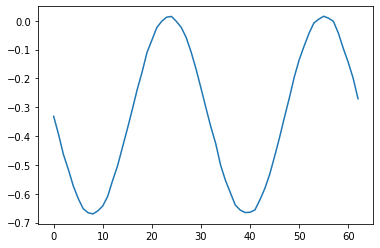

In [36]:
### full angle scan
import matplotlib.pyplot as plt
%matplotlib inline

theta_list = np.arange(0,2*np.pi, 0.1)
# theta_list = np.arange(0.98*np.pi, 1.02*np.pi, 0.001)

E_list = [GIVE_ENERGY(theta) for theta in theta_list]

plt.plot(E_list)
print(min(E_list))

In [ ]:
Hamilt.molecule.fci_energy

# checking with linear alg (exp operator function!)

$$U_{UCCSD}^{H2}=e^{-i \theta Y_{0} X_{1} X_{2} X_{3}}$$

In [426]:
theta=np.pi/10

In [427]:
from quchem.Ansatz_Generator_Functions import *
from numpy import kron
from functools import reduce

pauliDict={'X':np.array([[0,1],[1,0]]),
          'Y':np.array([[0,-1j],[1j,0]]),
          'Z':np.array([[1,0],[0,-1]]),
          'I': np.eye(2)}


n_electrons=2
n_qubits=4

ansatz_obj = Ansatz(n_electrons, n_qubits)
ansatz_obj.Get_JW_HF_state()

HF_reference_ket= ansatz_obj.Get_JW_HF_state().reshape([len(ansatz_obj.Get_JW_HF_state()), 1])


list_of_ops = [pauliDict[term[0]] for term in 'Y0 X1 X2 X3'.split(' ')]
matrix = reduce(kron, list_of_ops) *-1j #NOTE NEED TO MULTIPLY BY 1j!

import scipy

ansatz_state_ket = scipy.sparse.linalg.expm_multiply(theta*matrix, HF_reference_ket)
ansatz_state_ket

array([[ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [-0.30901699+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.95105652+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j]])

R is defined as:

$$R=\exp (-i \alpha \mathcal{X} / 2)$$

$$\mathcal{X} =i \sum_{k=1}^{n-1} \delta_{k} P_{k} P_{n} = i \sum_{k=1}^{n-1} \delta_{k} P_{kn}$$

In [428]:
print('NOTE: ZX = iY ... and ... XZ = -iY ')
anit_commuting_sets[10]

NOTE: ZX = iY ... and ... XZ = -iY 


[(-0.2234315367466397+0j) [Z3], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]]

In [494]:
S_INDEX= 0 #<-- 0/1 is variable here!!!

N_system_qubits = 4
X_DICT = Get_X_SET(anit_commuting_sets[7], S_INDEX) # <-- 0/1 is variable here!!!

if np.cos(X_DICT['phi_n_1'])<0:
    FACTOR = -1
else:
    FACTOR = 1


####

alpha = X_DICT['phi_n_1']
P_n = X_DICT['P_n']

list_of_X_qNos,list_of_X_ops = list(zip(*[Paulistrs for qubitOp in X_DICT['X_PauliWords'] for Paulistrs, const in qubitOp.terms.items()][0]))

list_of_X_constants = [const for qubitOp in X_DICT['X_PauliWords'] for Paulistrs, const in qubitOp.terms.items()]

list_of_X_qNos = np.array(list_of_X_qNos)
all_qubit_Nos = np.arange(0,N_system_qubits-1)

common_qubits = np.intersect1d(list_of_X_qNos, all_qubit_Nos)

missing_qubitNos = [i for i in all_qubit_Nos if i not in common_qubits]

X_ops=[]
X_sign =[]
for qNo in range(N_system_qubits):
    if qNo in list_of_X_qNos:
        index = list_of_X_qNos.tolist().index(qNo)
        X_ops.append(list_of_X_ops[index])
        X_sign.append(list_of_X_constants[0])
    else:
        X_ops.append('I')
        X_sign.append(1)

print('X = 1i *', X_DICT['H_n_1'], '* (', P_n, ')')
print('')  
print('NOTE: YZ = iX ... and ... ZY = -iX ')
print('')
print('X =', X_ops, 'signs:',X_sign)


list_of_X_ops_matrices = [pauliDict[term] for i, term in enumerate(X_ops)]
X_matrix = reduce(kron, list_of_X_ops_matrices)
SIGN = reduce(np.multiply, list_of_X_constants)
post_R_state = scipy.sparse.linalg.expm_multiply(-1j*SIGN*alpha/2*X_matrix, ansatz_state_ket)
post_R_state

# list_of_X_ops_matrices = [X_sign[i]* pauliDict[term] for i, term in enumerate(X_ops)]
# X_matrix = reduce(kron, list_of_X_ops_matrices)
# post_R_state = scipy.sparse.linalg.expm_multiply(-1j*alpha/2*X_matrix, ansatz_state_ket)
# post_R_state

X = 1i * [(1+0j) [X0 Y1 Y2 X3]] * ( 1 [Z0] )

NOTE: YZ = iX ... and ... ZY = -iX 

X = ['Y', 'Y', 'Y', 'X'] signs: [(1+0j), (1+0j), (1+0j), (1+0j)]


array([[ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [-0.42896812+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.90331963+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j]])

In [495]:
change_basis_dict ={
    'X':cirq.ry(-np.pi / 2)._unitary_(),
    'Y':cirq.rx(np.pi / 2)._unitary_(),
    'Z': np.eye(2),
    'I': np.eye(2)}


In [496]:
list_of_Pn_qNos,list_of_Pn_ops = list(zip(*[Paulistrs for Paulistrs, const in P_n.terms.items()][0]))

list_of_Pn_qNos = np.array(list_of_Pn_qNos)
all_qubit_Nos = np.arange(0,N_system_qubits-1)

common_qubits = np.intersect1d(list_of_Pn_qNos, all_qubit_Nos)

missing_qubitNos = [i for i in all_qubit_Nos if i not in common_qubits]

Pn_ops=[]
for qNo in range(N_system_qubits):
    if qNo in list_of_Pn_qNos:
        index = list_of_Pn_qNos.tolist().index(qNo)
        Pn_ops.append(list_of_Pn_ops[index])
    else:
        Pn_ops.append('I')
print(Pn_ops)

Change_basis_Pn_ops = [change_basis_dict[term] for term in Pn_ops]
Change_basis_Pn_MATRIX = reduce(kron, Change_basis_Pn_ops)

['Z', 'I', 'I', 'I']


In [497]:
final_state = np.dot(Change_basis_Pn_MATRIX, post_R_state)
print(final_state)

[[ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [-0.42896812+0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.90331963+0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]
 [ 0.        +0.j]]


In [498]:
# for i in range(N_system_qubits**2):
#     print('probability of getting state:', Get_state_as_str(N_system_qubits, i), np.absolute(final_state[i][0])**2)

output_dict={}
for i in range(N_system_qubits**2):
    output_dict[Get_state_as_str(N_system_qubits, i)] = int(1000*np.absolute(final_state[i][0])**2)
output_dict

{'0000': 0,
 '0001': 0,
 '0010': 0,
 '0011': 184,
 '0100': 0,
 '0101': 0,
 '0110': 0,
 '0111': 0,
 '1000': 0,
 '1001': 0,
 '1010': 0,
 '1011': 0,
 '1100': 815,
 '1101': 0,
 '1110': 0,
 '1111': 0}

In [502]:
print(P_n)

m_dict={}
for state in output_dict:
    state_measured = np.take([bit for bit in state], list_of_Pn_qNos.tolist()) # selects qubit indices measured!
    new_str = ''.join(state_measured)
    if new_str in m_dict.keys():
        m_dict[new_str] += output_dict[state]
    else:
        m_dict[new_str] = output_dict[state]

print(m_dict)
print(FACTOR, reduce(np.multiply, list_of_X_constants))
expectation_value_by_parity(m_dict)

1 [Z0]
{'0': 184, '1': 815}
1 (1+0j)


-0.6316316316316316

## something wrong!!!!!!
- should get same outputs!